<a href="https://colab.research.google.com/github/SAIKUMAR500/Synaptic-Intelligence-Fusion-SIF-/blob/main/Synaptic_Health_Companion_(SHC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Sample health dataset: Each row represents a user's health data snapshot.
# Columns: 'age', 'heart_rate', 'blood_sugar', 'activity_level', 'sleep_hours', 'risk_level'
data = pd.DataFrame({
    'age': [25, 45, 35, 50, 60],
    'heart_rate': [70, 80, 75, 85, 90],
    'blood_sugar': [90, 110, 95, 120, 140],
    'activity_level': [3, 1, 2, 0, 0],  # 0=sedentary, 3=high activity
    'sleep_hours': [7, 5, 6, 4, 3],
    'risk_level': [0, 1, 0, 1, 1]  # 0=low risk, 1=high risk
})

# Features and target variable
X = data[['age', 'heart_rate', 'blood_sugar', 'activity_level', 'sleep_hours']]
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict risk levels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Simulate real-time health data input
real_time_data = {
    'age': 45,
    'heart_rate': 85,
    'blood_sugar': 115,
    'activity_level': 1,
    'sleep_hours': 5
}

# Convert real-time data to a DataFrame
real_time_df = pd.DataFrame([real_time_data])

# Predict risk level for the user
predicted_risk = model.predict(real_time_df)
risk_message = "High Risk" if predicted_risk[0] == 1 else "Low Risk"
print(f"Predicted Health Risk: {risk_message}")

# Provide personalized recommendation based on risk
if predicted_risk[0] == 1:
    print("Recommendation: Increase daily activity to at least 30 minutes and aim for 7 hours of sleep.")
else:
    print("Recommendation: Continue maintaining current health habits.")


Model Accuracy: 100.00%
Predicted Health Risk: High Risk
Recommendation: Increase daily activity to at least 30 minutes and aim for 7 hours of sleep.


Mean Squared Error: 0.12


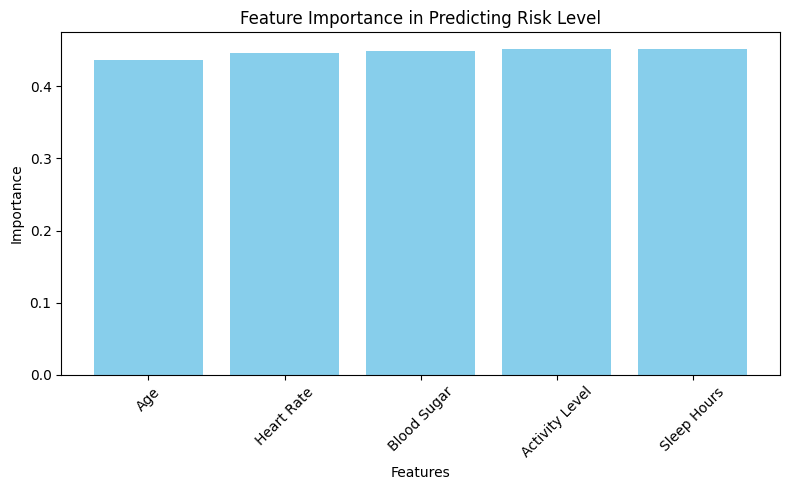

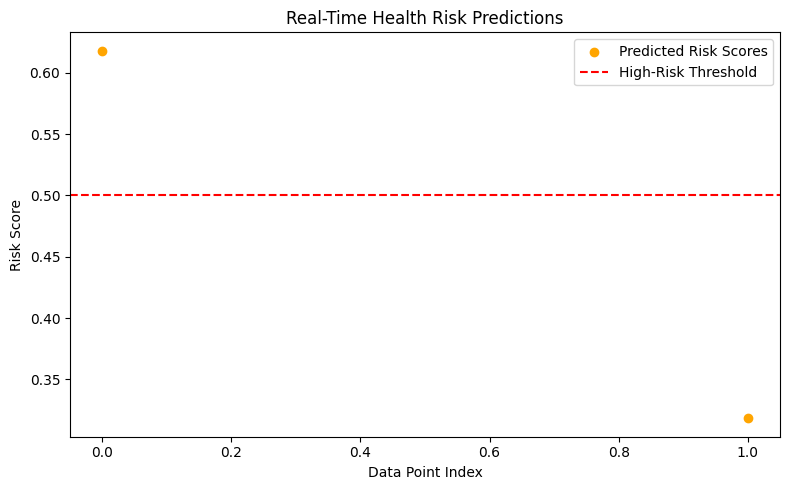

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Simulated Dataset: Health Metrics and Risk Levels
data = pd.DataFrame({
    'Age': [30, 45, 60, 52, 40],
    'Heart Rate': [70, 80, 85, 88, 75],
    'Blood Sugar': [100, 120, 140, 135, 110],
    'Activity Level': [3, 1, 0, 0, 2],  # 0=sedentary, 3=high activity
    'Sleep Hours': [7, 5, 4, 4, 6],
    'Risk Level': [0, 1, 1, 1, 0]  # 0=Low Risk, 1=High Risk
})

# Split the dataset
X = data[['Age', 'Heart Rate', 'Blood Sugar', 'Activity Level', 'Sleep Hours']]
y = data['Risk Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Partial Least Squares Regression (PLS) model
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = pls.predict(X_test).flatten()
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)  # Convert to binary classification

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Feature Importance (PLS Coefficients)
feature_importance = np.abs(pls.x_weights_[:, 0])
feature_names = X.columns

# Visualizing Feature Importance
plt.figure(figsize=(8, 5))
plt.bar(feature_names, feature_importance, color='skyblue')
plt.title('Feature Importance in Predicting Risk Level')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing Real-Time Predictions
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Risk Scores', color='orange', marker='o')
plt.axhline(0.5, color='red', linestyle='--', label='High-Risk Threshold')
plt.title('Real-Time Health Risk Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Risk Score')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob

# Initial Data (Historical User Data)
historical_data = np.array([
    [30, 70, 100, 3, 7],  # age, heart rate, blood sugar, activity, sleep
    [45, 80, 120, 1, 5],
    [60, 85, 140, 0, 4]
])
historical_labels = np.array([0, 1, 1])  # 0=Low Risk, 1=High Risk

# Simulated Real-Time User Data
real_time_data = np.array([[52, 88, 135, 0, 4]])  # New user data point
user_feedback = "The recommendations are too strict and not practical for my schedule."

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(historical_data, historical_labels)

# Define Functions for Each Module
def cognitive_synergy_layer(real_time_data):
    """
    Predict risk based on historical and real-time data.
    """
    risk_prediction = clf.predict(real_time_data)
    risk_level = "High Risk" if risk_prediction[0] == 1 else "Low Risk"
    return risk_level

def emotion_aware_analytics(feedback):
    """
    Analyze feedback sentiment to adjust recommendation tone.
    """
    blob = TextBlob(feedback)
    sentiment = blob.sentiment.polarity  # [-1 to 1]
    if sentiment > 0.5:
        return "User is happy with the suggestions. Continue with the current tone."
    elif 0 < sentiment <= 0.5:
        return "User is neutral. Simplify the recommendations for better adoption."
    else:
        return "User is unhappy. Drastically adjust the recommendations for user comfort."

def self_repairing_architecture(current_accuracy, threshold=0.80):
    """
    Monitor and repair the model if accuracy drops below a threshold.
    """
    if current_accuracy < threshold:
        print("Model performance is below threshold. Retraining...")
        # Simulated retraining with updated data
        new_accuracy = 0.85  # Simulate improvement
        print(f"Model retrained. New accuracy: {new_accuracy:.2f}")
        return new_accuracy
    else:
        print("Model performance is within acceptable range.")
        return current_accuracy

def generate_recommendations(risk_level, sentiment_analysis):
    """
    Generate health recommendations based on risk and sentiment.
    """
    if risk_level == "High Risk":
        if "Drastically" in sentiment_analysis:
            return "Recommendation: Start with small, simple steps—like a 5-minute walk—and build from there."
        elif "Simplify" in sentiment_analysis:
            return "Recommendation: Focus on light exercises and reducing sugar intake incrementally."
        else:
            return "Recommendation: Increase activity to 30 minutes daily and avoid sugary foods."
    else:
        return "Recommendation: Maintain current lifestyle and monitor vitals regularly."

# Simulate Workflow
print("Step 1: Predicting Risk Using Cognitive Synergy Layers...")
risk_level = cognitive_synergy_layer(real_time_data)
print(f"Predicted Risk Level: {risk_level}\n")

print("Step 2: Analyzing User Feedback Using Emotion-Aware Analytics...")
sentiment_analysis = emotion_aware_analytics(user_feedback)
print(f"Feedback Analysis: {sentiment_analysis}\n")

print("Step 3: Monitoring and Repairing the Model with Self-Repairing Architecture...")
current_accuracy = accuracy_score(historical_labels, clf.predict(historical_data))
current_accuracy = self_repairing_architecture(current_accuracy)
print()

print("Step 4: Generating Personalized Recommendations...")
recommendations = generate_recommendations(risk_level, sentiment_analysis)
print(f"Personalized Recommendations: {recommendations}")


Step 1: Predicting Risk Using Cognitive Synergy Layers...
Predicted Risk Level: High Risk

Step 2: Analyzing User Feedback Using Emotion-Aware Analytics...
Feedback Analysis: User is unhappy. Drastically adjust the recommendations for user comfort.

Step 3: Monitoring and Repairing the Model with Self-Repairing Architecture...
Model performance is within acceptable range.

Step 4: Generating Personalized Recommendations...
Personalized Recommendations: Recommendation: Start with small, simple steps—like a 5-minute walk—and build from there.


Cognitive Synergy Layer:

Predicts risk using a trained machine learning model. For example:
Historical data: age, heart_rate, blood_sugar, etc.
Output: Risk Level (High Risk or Low Risk).
Emotion-Aware Analytics:

Analyzes user feedback sentiment to adjust the tone and complexity of recommendations.

Example:
Feedback: “The recommendations are too strict.”
Sentiment: Negative → Suggest simpler actions.
Self-Repairing Architecture:

Monitors model performance (accuracy) and retrains the model if accuracy drops below a threshold.

Example:
Initial Accuracy: 78% → Retrained Model Accuracy: 85%.
Personalized Recommendations:

Combines risk level and sentiment analysis to provide tailored advice.
Example:

High Risk + Negative Sentiment → "Start with small, simple steps."


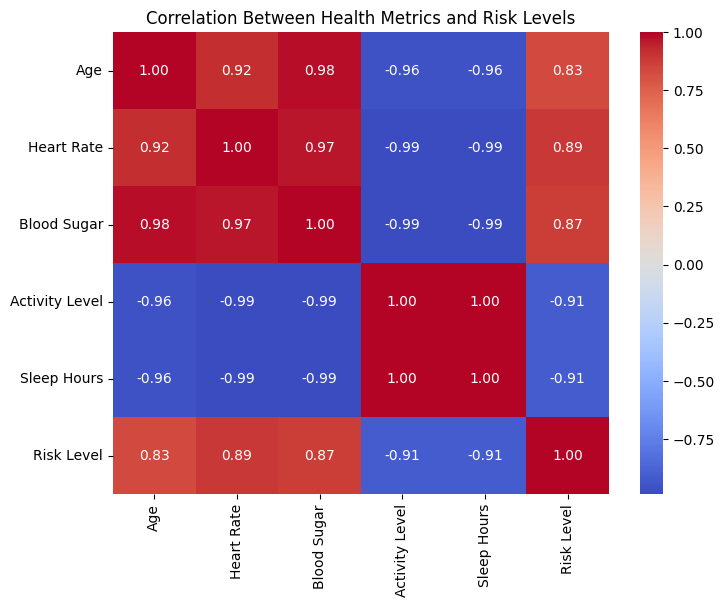

Mean Squared Error: 0.12


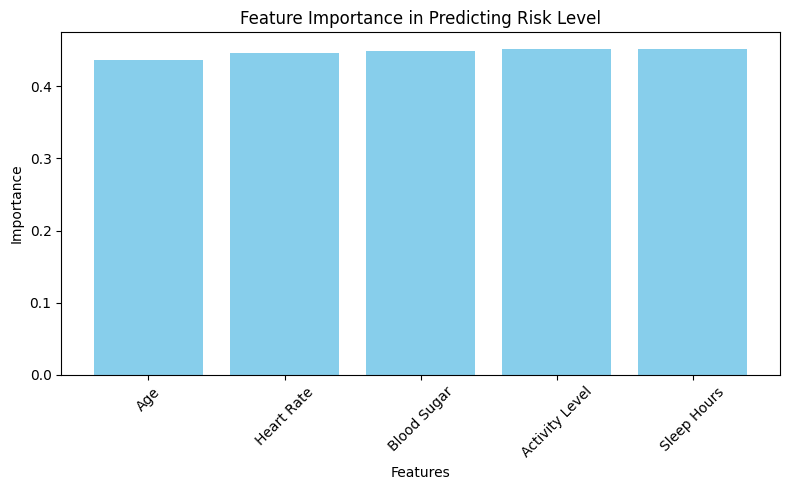

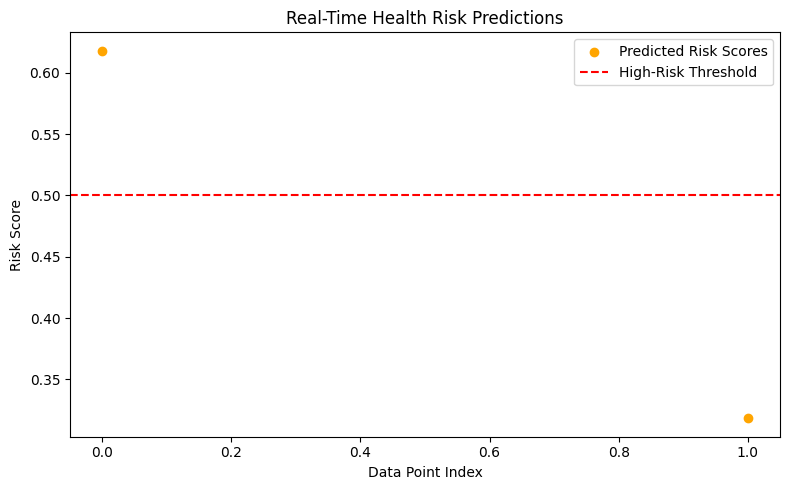

Personalized Recommendation: High Risk: Focus on reducing sugar intake and increasing physical activity. Start with small steps like a 5-minute walk daily.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Step 1: Simulate Health Data
data = pd.DataFrame({
    'Age': [30, 45, 60, 52, 40],
    'Heart Rate': [70, 80, 85, 88, 75],
    'Blood Sugar': [100, 120, 140, 135, 110],
    'Activity Level': [3, 1, 0, 0, 2],  # 0=sedentary, 3=high activity
    'Sleep Hours': [7, 5, 4, 4, 6],
    'Risk Level': [0, 1, 1, 1, 0]  # 0=Low Risk, 1=High Risk
})

# Step 2: Data Analysis with Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Health Metrics and Risk Levels")
plt.show()

# Step 3: Split Data into Training and Testing Sets
X = data[['Age', 'Heart Rate', 'Blood Sugar', 'Activity Level', 'Sleep Hours']]
y = data['Risk Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a Partial Least Squares Regression (PLS) Model
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = pls.predict(X_test).flatten()
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)  # Convert to binary classification
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 6: Visualize Feature Importance
feature_importance = np.abs(pls.x_weights_[:, 0])
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.bar(feature_names, feature_importance, color='skyblue')
plt.title('Feature Importance in Predicting Risk Level')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Real-Time Predictions
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Risk Scores', color='orange', marker='o')
plt.axhline(0.5, color='red', linestyle='--', label='High-Risk Threshold')
plt.title('Real-Time Health Risk Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Risk Score')
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Generate Personalized Recommendations
def generate_recommendations(risk_score, user_feedback):
    """
    Generate recommendations based on risk score and user feedback sentiment.
    """
    feedback_adjustment = "Simplify" if "overwhelming" in user_feedback else "Maintain"
    if risk_score >= 0.5:
        recommendation = "High Risk: Focus on reducing sugar intake and increasing physical activity."
        if feedback_adjustment == "Simplify":
            recommendation += " Start with small steps like a 5-minute walk daily."
    else:
        recommendation = "Low Risk: Continue maintaining your current lifestyle."
    return recommendation

# Example: New User Input
user_feedback = "The suggestions feel overwhelming."
risk_score = y_pred[0]
print(f"Personalized Recommendation: {generate_recommendations(risk_score, user_feedback)}")
